In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import glob

In [2]:
import zipfile
import os
import random

# Path to the zip file
zip_path = 'C:/Users/hp/dog-vs-cat-classification.zip'

# Directory where you want to extract the contents
extraction_path = 'C:\\Users\\hp\\dataset'


# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Dataset extracted.")

Dataset extracted.


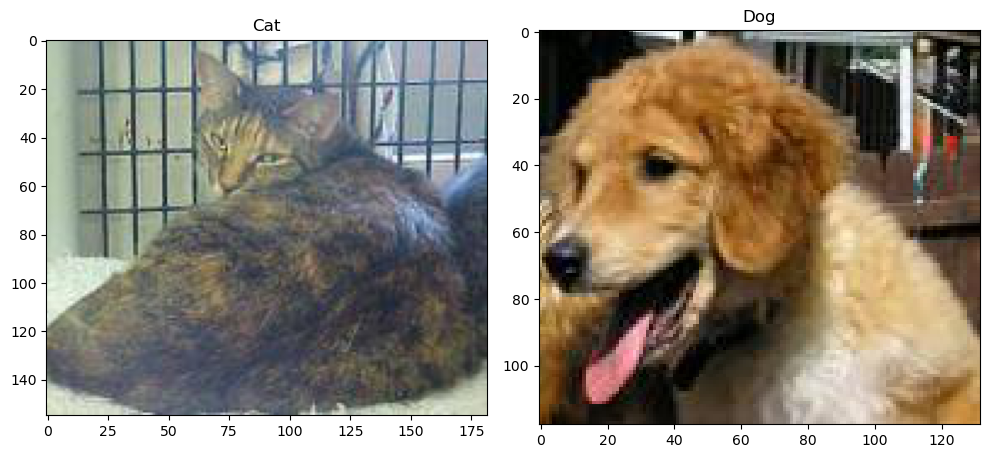

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

# Paths to the cat and dog directories within the train folder
cats_dir_train = os.path.join(extraction_path, 'dogs_vs_cats', 'train', 'cats')
dogs_dir_train = os.path.join(extraction_path, 'dogs_vs_cats', 'train','dogs')

# Load random cat and dog images
random_cat = random.choice(os.listdir(cats_dir_train))
random_dog = random.choice(os.listdir(dogs_dir_train))

cat_path = os.path.join(cats_dir_train, random_cat)
dog_path = os.path.join(dogs_dir_train, random_dog)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
cat_img = mpimg.imread(cat_path)
plt.imshow(cat_img)
plt.title('Cat')

plt.subplot(1, 2, 2)
dog_img = mpimg.imread(dog_path)
plt.imshow(dog_img)
plt.title('Dog')

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras

In [7]:
# model 
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False, weights='imagenet')


In [8]:
for layer in base_model.layers:
    layer.trainable=False


In [9]:
X= Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)
#Final Model
model=Model(base_model.input,X)
#compile the model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 29, 29, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 29, 29, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 29, 29, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 29, 29, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 29, 29, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 29, 29, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 29, 29, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 29, 29, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 29, 29, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 29, 29, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 14, 14, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 14, 14, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 14, 14, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 14, 14, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 14, 14, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 14, 14, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 14, 14, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 14, 14, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 14, 14, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 14, 14, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 14, 14, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 14, 14, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 14, 14, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 14, 14, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 14, 14, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 14, 14, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 14, 14, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 6, 6, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 6, 6, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 6, 6, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 6, 6, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 6, 6, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [10]:
train_datagen=ImageDataGenerator(featurewise_center=True,rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)

In [11]:
train_data=train_datagen.flow_from_directory(directory="C:\\Users\\hp\\images",target_size=(256, 256),batch_size=64)

Found 20000 images belonging to 2 classes.


In [12]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
t_img,label=train_data.next()

In [14]:
t_img.shape

(64, 256, 256, 3)

In [15]:
def plotImages(img_arr,label):
    """"
    input: image array
    output: plot images
    """
    for idx,img in enumerate(img_arr):
        if idx<=10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis= False
            plt.show()

In [16]:
t_img,label=train_data.next()

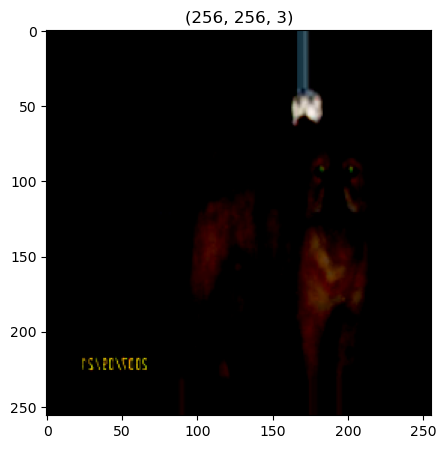

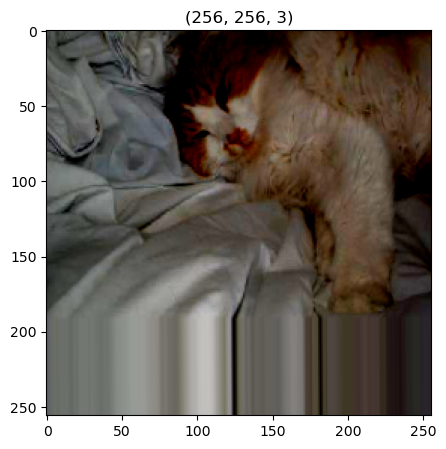

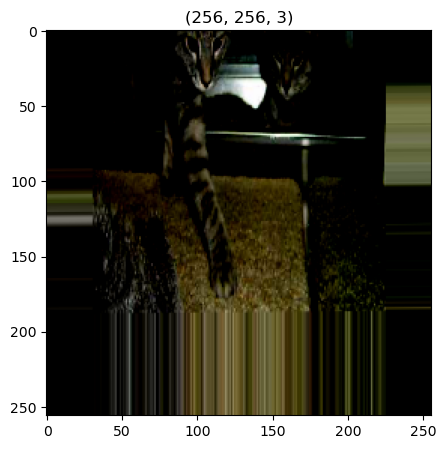

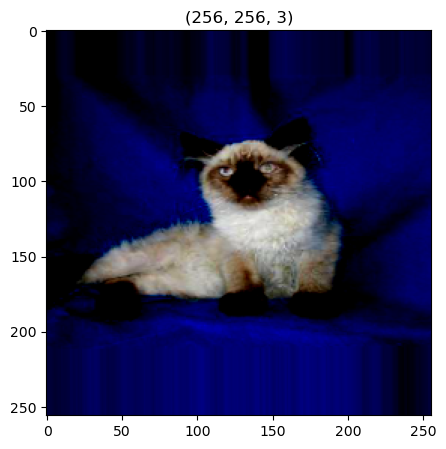

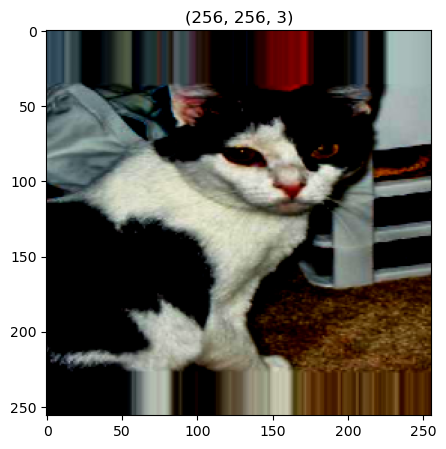

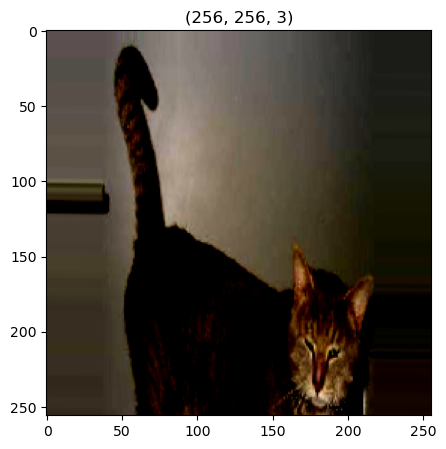

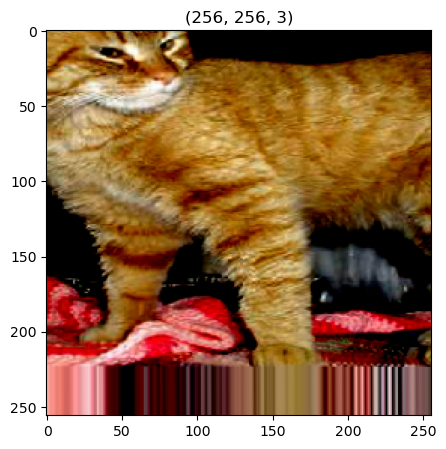

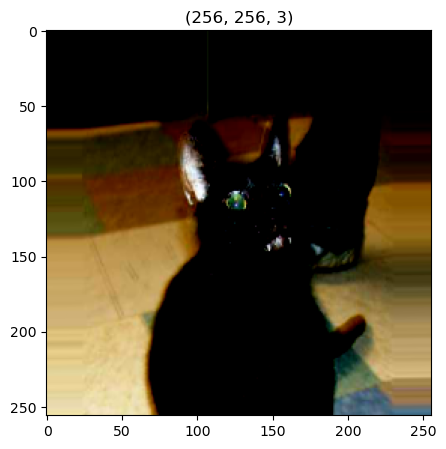

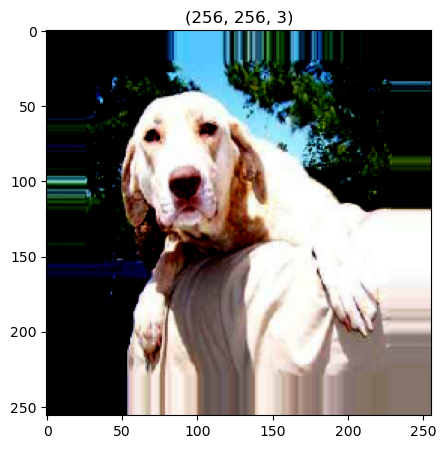

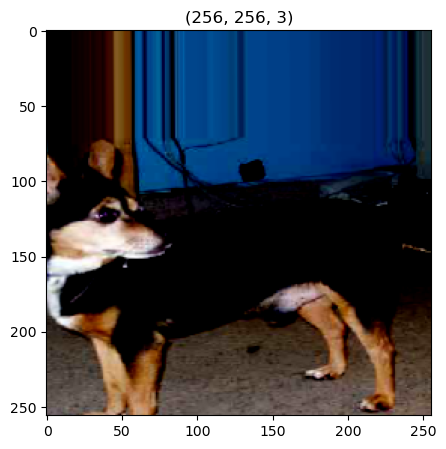

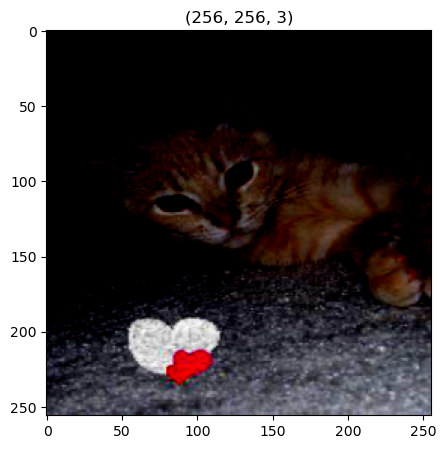

In [116]:
plotImages(t_img,label)

In [18]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc= ModelCheckpoint(filepath="C://Users//hp//.keras//models",monitor="accuracy",verbose=1,save_best_only=True)

es=EarlyStopping(monitor="accuracy",min_delta=0.01,patience=5,verbose=1)
cb=[mc,es]

In [19]:
his=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.2578 - accuracy: 0.8250
Epoch 1: accuracy improved from -inf to 0.82500, saving model to C://Users//hp//.keras\models
INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


10/10 [==============================] - 105s 10s/step - loss: 1.2578 - accuracy: 0.8250
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.3411 - accuracy: 0.9719
Epoch 2: accuracy improved from 0.82500 to 0.97188, saving model to C://Users//hp//.keras\models
INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


10/10 [==============================] - 86s 9s/step - loss: 0.3411 - accuracy: 0.9719
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9797
Epoch 3: accuracy improved from 0.97188 to 0.97969, saving model to C://Users//hp//.keras\models
INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


10/10 [==============================] - 100s 10s/step - loss: 0.2484 - accuracy: 0.9797
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1595 - accuracy: 0.9781
Epoch 4: accuracy did not improve from 0.97969
10/10 [==============================] - 54s 5s/step - loss: 0.1595 - accuracy: 0.9781
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.9844
Epoch 5: accuracy improved from 0.97969 to 0.98438, saving model to C://Users//hp//.keras\models
INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


INFO:tensorflow:Assets written to: C://Users//hp//.keras\models/assets


10/10 [==============================] - 91s 9s/step - loss: 0.1423 - accuracy: 0.9844
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9672 
Epoch 6: accuracy did not improve from 0.98438
10/10 [==============================] - 117s 12s/step - loss: 0.2037 - accuracy: 0.9672
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9844 
Epoch 7: accuracy did not improve from 0.98438
10/10 [==============================] - 114s 10s/step - loss: 0.1174 - accuracy: 0.9844
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.1449 - accuracy: 0.9781 
Epoch 8: accuracy did not improve from 0.98438
10/10 [==============================] - 105s 10s/step - loss: 0.1449 - accuracy: 0.9781
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.1447 - accuracy: 0.9766
Epoch 9: accuracy did not improve from 0.98438
10/10 [==============================] - 104s 10s/step - loss: 0.1447 - accurac

In [22]:
from keras.models import load_model
model=load_model("C://Users//hp//.keras//models")



In [26]:
h=his.history
h.keys()


dict_keys(['loss', 'accuracy'])

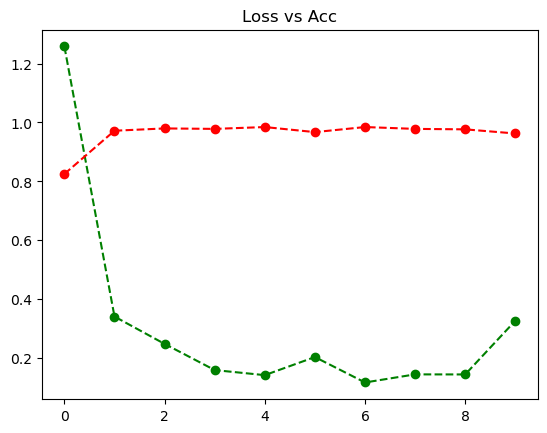

In [27]:
#plot loss vs accuracy
plt.plot(h['loss'],'go--',c='green')
plt.plot(h['accuracy'],'go--',c='red',)
plt.title("Loss vs Acc")
plt.show()


1/1 [==============================] - 0s 218ms/step


The image is of cat


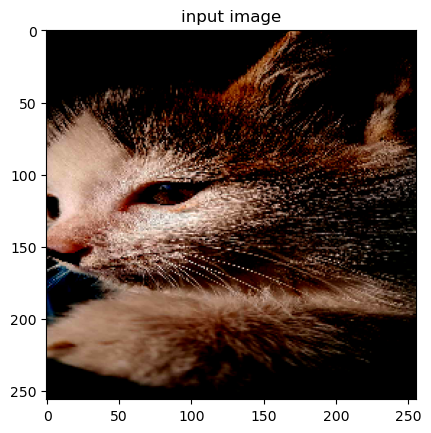

In [108]:
#input image
path="C://Users//hp//OneDrive//Desktop//PHOTOS//WhatsApp Images//IMG-20210831-WA0025.jpg"
img=load_img(path,target_size=(256,256))
i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape
pred=np.argmax(model.predict(input_arr))



if pred==0:
    print("The image is of cat")
else:
    print("The image is of dog")
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()
    


In [109]:
def get_img_arr(path):
    img=load_img(path,target_size=(256,256))
    img_array=img_to_array(img)
    img_array=preprocess_input(i)
    input_arr=np.array([img_array])
    return img_array

In [110]:
import tensorflow as tf

In [111]:

def make_gradcam_heatmap(img_arr, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model([model.input], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_arr)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

        

In [112]:
from IPython.display import Image, display
from PIL import Image as PILImage

In [113]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import Image,display
from tensorflow.keras.preprocessing import image as keras_image
def save_and_display_gradcam(img_path,heatmap,cam_path="cam.jpg",alpha=0.4):
    img=(load_img(img_path))
    img = PILImage.open(img_path)
    heatmap=np.uint8(255*heatmap)
    jet=cm.get_cmap("jet")
    jet_colors=jet(np.arange(256))[:,:3]
    jet_heatmap=jet_colors[heatmap]
    
    jet_heatmap = keras_image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize(img.size, PILImage.LANCZOS) 
    jet_heatmap = keras_image.img_to_array(jet_heatmap)
    img_array = keras_image.img_to_array(img)
    superimposed_img = jet_heatmap * alpha + img_array

    plt.imshow(np.uint8(superimposed_img))
   
    plt.savefig(cam_path, bbox_inches='tight', pad_inches=0)
    plt.show()


In [114]:
def image_prediction_and_visualization(path,last_conv_layer_name="conv2d_93",model=model):
    #img = load_img(path, target_size=(256, 256))  # Load and resize the image
    #img = load_img(path, target_size=(256, 256))  # Load and resize the image
    #img_array = img_to_array(img)
   
    #img_array = np.expand_dims(img_array, axis=0)
    #img_array = preprocess_input(img_array)
    img = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    heatmap=make_gradcam_heatmap(img_array,model,last_conv_layer_name)
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    heatmap = heatmap.astype(np.float32)

    
    
   
    plt.title("the heat map of the image is ")
    plt.imshow(heatmap)
    plt.show()
   
    pred=np.argmax(model.predict(preprocess_input(img_array)))
    print()
    print()
    print()
    if pred==0:
        print("The image is of Cat")
    else:
        print("The image is of Dog")
    print()
    print()
    print()
    print("image with heatmap representing region of interest")
    save_and_display_gradcam(path,heatmap)
    plt.show()
    
    print()
    print("the original input image")
    print()
    a=plt.imread(path)
    plt.imshow(a,cmap="gray")
    plt.title("Original image")
    plt.show()

    

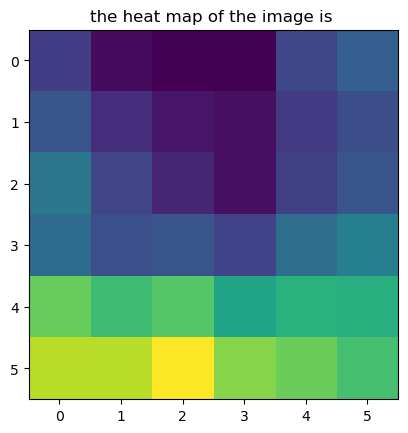

1/1 [==============================] - 0s 231ms/step



The image is of Cat



image with heatmap representing region of interest


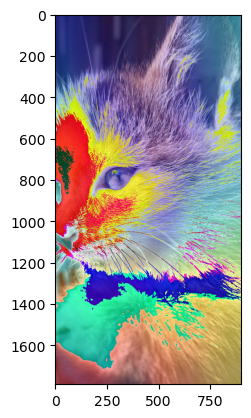


the original input image



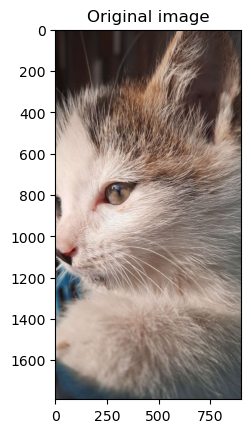

In [115]:
path="C://Users//hp//OneDrive//Desktop//PHOTOS//WhatsApp Images//IMG-20210831-WA0025.jpg"
image_prediction_and_visualization(path)